In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### In the following cells I will be loading and changing the data to the correct types in preparation of EDA

In [2]:
info_df = pd.read_csv(r'result_files\general_info.csv')
info_df.head()

,Unnamed: 0,hand_id,table_name,dealer_pos,pot_size,winner_player_id,winner_position,pot_size_z,hand_ended_on,dealer_player_id
0,0,3.017237e+09,INDIANA ST,5,2.0,DeZAZcPNNQ5w+Wb+5ujZdA,small blind,0.401559,preflop,vETYfpoA+FhBercnDPJrRw
1,1,3.017235e+09,ALABAMA ST,4,3.0,uwsIGbIB4ktlhz44JKQKDQ,small blind,0.368939,river,s32h30cC3rPhG5FiSCU42g
2,2,3.017243e+09,CORTEZ AVE,2,17.0,LHSEggf8hUg0kqvaCgiJcw,other,0.087739,flop,kExuS3SxZYRG/oFTl97LzA
3,3,3.017249e+09,GEORGIA HWY,1,23.5,kukN3pTqN1CyHqx/bq+8xw,dealer,0.299768,river,kukN3pTqN1CyHqx/bq+8xw
4,4,3.017240e+09,BREWERY ST,6,2.5,AiiJXMM0CfYl69+Nq3jyfA,other,0.385249,preflop,TiIZzdoB4G68QIRlf2vUrQ


In [3]:
details_df = pd.read_csv(r'result_files\details_expanded.csv')
details_df.head()

C:\Users\Yanming\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,hand_id,player_id,seat,stack,position,post,preflop,p_amount,flop,f_amount,turn,t_amount,river,r_amount
0,0,3.017237e+09,vETYfpoA+FhBercnDPJrRw,5,197,dealer,0.0,Folds,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,1,3.017237e+09,DeZAZcPNNQ5w+Wb+5ujZdA,6,200.3,small blind,0.5,Raises,2.5,NaN,0.0,NaN,0.0,NaN,0.0
2,2,3.017237e+09,AiiJXMM0CfYl69+Nq3jyfA,2,78.5,other,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
3,3,3.017237e+09,id+sbECX+YdI8qhMhpje+g,3,81.6,big blind,1.0,Folds,0.0,NaN,0.0,NaN,0.0,NaN,0.0
4,4,3.017235e+09,s32h30cC3rPhG5FiSCU42g,4,55.5,dealer,0.0,Folds,0.0,NaN,0.0,NaN,0.0,NaN,0.0


In [4]:
# drop the redundant index column
info_df.drop('Unnamed: 0', axis=1, inplace=True)
details_df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
info_df.dtypes

hand_id             float64
table_name           object
dealer_pos            int64
pot_size            float64
winner_player_id     object
winner_position      object
pot_size_z          float64
hand_ended_on        object
dealer_player_id     object
dtype: object

In [6]:
conv_dict = {
    'hand_id':str,
    'dealer_pos':str
}
info_df = info_df.astype(conv_dict)
info_df.head()

,hand_id,table_name,dealer_pos,pot_size,winner_player_id,winner_position,pot_size_z,hand_ended_on,dealer_player_id
0,3017237436.0,INDIANA ST,5,2.0,DeZAZcPNNQ5w+Wb+5ujZdA,small blind,0.401559,preflop,vETYfpoA+FhBercnDPJrRw
1,3017235188.0,ALABAMA ST,4,3.0,uwsIGbIB4ktlhz44JKQKDQ,small blind,0.368939,river,s32h30cC3rPhG5FiSCU42g
2,3017243048.0,CORTEZ AVE,2,17.0,LHSEggf8hUg0kqvaCgiJcw,other,0.087739,flop,kExuS3SxZYRG/oFTl97LzA
3,3017249292.0,GEORGIA HWY,1,23.5,kukN3pTqN1CyHqx/bq+8xw,dealer,0.299768,river,kukN3pTqN1CyHqx/bq+8xw
4,3017240160.0,BREWERY ST,6,2.5,AiiJXMM0CfYl69+Nq3jyfA,other,0.385249,preflop,TiIZzdoB4G68QIRlf2vUrQ


In [7]:
details_df.dtypes

hand_id      float64
player_id     object
seat           int64
stack         object
position      object
post         float64
preflop       object
p_amount     float64
flop          object
f_amount     float64
turn          object
t_amount     float64
river         object
r_amount     float64
dtype: object

In [8]:
conv_dict = {
    'hand_id':str,
    'seat':str,
    'stack':str,
}
details_df = details_df.astype(conv_dict)
details_df.head()

,hand_id,player_id,seat,stack,position,post,preflop,p_amount,flop,f_amount,turn,t_amount,river,r_amount
0,3017237436.0,vETYfpoA+FhBercnDPJrRw,5,197.0,dealer,0.0,Folds,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,3017237436.0,DeZAZcPNNQ5w+Wb+5ujZdA,6,200.3,small blind,0.5,Raises,2.5,NaN,0.0,NaN,0.0,NaN,0.0
2,3017237436.0,AiiJXMM0CfYl69+Nq3jyfA,2,78.5,other,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
3,3017237436.0,id+sbECX+YdI8qhMhpje+g,3,81.6,big blind,1.0,Folds,0.0,NaN,0.0,NaN,0.0,NaN,0.0
4,3017235188.0,s32h30cC3rPhG5FiSCU42g,4,55.5,dealer,0.0,Folds,0.0,NaN,0.0,NaN,0.0,NaN,0.0


In [9]:
details_df.dtypes

hand_id       object
player_id     object
seat          object
stack         object
position      object
post         float64
preflop       object
p_amount     float64
flop          object
f_amount     float64
turn          object
t_amount     float64
river         object
r_amount     float64
dtype: object

There are ',' with in some 'stack' strings, which prevent them from coverting to floats. The commas occur when the stack size is over 1000 dollars.

In [10]:
details_df[details_df['stack'].str.contains(',')].head()

,hand_id,player_id,seat,stack,position,post,preflop,p_amount,flop,f_amount,turn,t_amount,river,r_amount
916690,3070713606.0,LtbAwVXEAqx38ZC2R6QFFw,3,"1,019.43",small blind,0.5,Folds,0.0,NaN,0.0,NaN,0.0,NaN,0.0
916778,3070714618.0,LtbAwVXEAqx38ZC2R6QFFw,3,"1,018.93",dealer,0.0,Raises,7.5,Bets,23.5,NaN,0.0,NaN,0.0
923488,3070797918.0,LtbAwVXEAqx38ZC2R6QFFw,3,"1,015.43",other,0.0,Folds,0.0,NaN,0.0,NaN,0.0,NaN,0.0
923586,3070799440.0,LtbAwVXEAqx38ZC2R6QFFw,3,"1,015.43",other,0.0,Raises,3.5,Checks,0.0,Bets,7.5,NaN,0.0
923666,3070800524.0,LtbAwVXEAqx38ZC2R6QFFw,3,"1,018.58",other,0.0,Calls,1.0,Bets,2.0,Checks,0.0,Calls,1.0


In [11]:
# replace the ','
stack_size = details_df['stack'].str.replace(',', '')
sum(stack_size.str.contains(','))

0

In [12]:
# replace the original stack column with the newly converted float values
details_df['stack'] = stack_size.astype(float)

In [13]:
details_df.dtypes

hand_id       object
player_id     object
seat          object
stack        float64
position      object
post         float64
preflop       object
p_amount     float64
flop          object
f_amount     float64
turn          object
t_amount     float64
river         object
r_amount     float64
dtype: object

### Who is the biggest winner?
#### I will attempt to find the biggest winner overall, and the biggest winner per hand. To do so, I will need the following information:
* Number of unique players
* Total amount of chips collected
* Total amount of chips invested through posts, raises, bets, calls
* Total number of hands involved

In [14]:
# number of unique players
details_df['player_id'].unique()

array(['vETYfpoA+FhBercnDPJrRw', 'DeZAZcPNNQ5w+Wb+5ujZdA',
       'AiiJXMM0CfYl69+Nq3jyfA', ..., 'DlEPf+wCWdrJWTKNtJT00Q',
       'NXhZEszjUArLqxtcr/dqxQ', 'wfeYUtNxo7zyqjxMPvaqAA'], dtype=object)

In [15]:
# number of hands where each player is present on the table.
# note this this different from the hands where the player actually put any money into the pot, which I'll explore later
player_info = pd.DataFrame(details_df['player_id'].value_counts())
player_info.columns = ['hands_played']
player_info

,hands_played
HQg4dAYPUt6c2wXfx8Qp2A,26449
igvhUfnIs8in/SlI6b2cug,19731
kIbanshKysxtdDXKqLAWsA,16410
yspTPyicC4Ere+tsoRHI1A,13411
vETYfpoA+FhBercnDPJrRw,12770
...,...
vxx7motq4y61khNJk6HB7w,1
vR71lLu9yRVOoMjEt2uD2w,1
1RLOAz26agGOHVFdpSGXdQ,1
2lxSLVDaFfn3U5MTlQlATg,1


In [16]:
# number of pots each player have won
pots_won = pd.DataFrame(info_df['winner_player_id'].value_counts())
pots_won.columns = ['pots_won']
pots_won

,pots_won
HQg4dAYPUt6c2wXfx8Qp2A,3723
igvhUfnIs8in/SlI6b2cug,2727
0xwi8WGdnBftzWVsP6tu8Q,2432
yspTPyicC4Ere+tsoRHI1A,1987
vETYfpoA+FhBercnDPJrRw,1857
...,...
qjUg15iIRRc46YCETMIr+Q,1
S4qX2eOPuqSRUWQGWW2STQ,1
zyAPby4Vard7BBI9rv5b/w,1
skYz5qxUQDzkouq1umpLcA,1


In [17]:
# total amount won
amount_won = info_df[['winner_player_id', 'pot_size']].groupby('winner_player_id').sum()
amount_won.columns = ['amount_won']
amount_won

,amount_won
winner_player_id,
++HNtoYfMEJQDBuUlgpmXw,17.00
++OJ33zjV02/PZlX7Tlz7w,378.30
++ZiLZDZQ+0Fp0aS/6ZQMQ,30.75
++igZ0CsO10FWuRQO+b3jA,1786.16
+//1khM9z4eFQt4kS3XzSA,788.00
...,...
zydUjo8AhaCaJR247d0iDg,2453.37
zyfElRdV2Nsi57YFgHKG1Q,87.00
zzENGKjKQ1jF+6RPYGuqrw,81.00


In [18]:
# total amount invested
details_df['invest'] = details_df[['post','p_amount','f_amount','t_amount','r_amount']].sum(axis=1)
details_df.head()

,hand_id,player_id,seat,stack,position,post,preflop,p_amount,flop,f_amount,turn,t_amount,river,r_amount,invest
0,3017237436.0,vETYfpoA+FhBercnDPJrRw,5,197.0,dealer,0.0,Folds,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0
1,3017237436.0,DeZAZcPNNQ5w+Wb+5ujZdA,6,200.3,small blind,0.5,Raises,2.5,NaN,0.0,NaN,0.0,NaN,0.0,3.0
2,3017237436.0,AiiJXMM0CfYl69+Nq3jyfA,2,78.5,other,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0
3,3017237436.0,id+sbECX+YdI8qhMhpje+g,3,81.6,big blind,1.0,Folds,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1.0
4,3017235188.0,s32h30cC3rPhG5FiSCU42g,4,55.5,dealer,0.0,Folds,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0


In [19]:
total_invest = details_df[['player_id','invest']].groupby('player_id').sum()
total_invest.columns = ['to_inv']
total_invest

,to_inv
player_id,
++HNtoYfMEJQDBuUlgpmXw,49.00
++OJ33zjV02/PZlX7Tlz7w,353.25
++ZiLZDZQ+0Fp0aS/6ZQMQ,40.50
++igZ0CsO10FWuRQO+b3jA,1583.82
+//1khM9z4eFQt4kS3XzSA,641.00
...,...
zydUjo8AhaCaJR247d0iDg,2468.56
zyfElRdV2Nsi57YFgHKG1Q,104.00
zzENGKjKQ1jF+6RPYGuqrw,85.93


In [20]:
player_info = player_info.join(pots_won).join(amount_won).join(total_invest).fillna(0)
player_info

,hands_played,pots_won,amount_won,to_inv
HQg4dAYPUt6c2wXfx8Qp2A,26449,3723.0,55512.26,69091.57
igvhUfnIs8in/SlI6b2cug,19731,2727.0,46252.14,53338.80
kIbanshKysxtdDXKqLAWsA,16410,1685.0,23442.41,29142.71
yspTPyicC4Ere+tsoRHI1A,13411,1987.0,36132.37,44316.40
vETYfpoA+FhBercnDPJrRw,12770,1857.0,22457.02,30732.37
...,...,...,...,...
vxx7motq4y61khNJk6HB7w,1,0.0,0.00,4.50
vR71lLu9yRVOoMjEt2uD2w,1,0.0,0.00,0.00
1RLOAz26agGOHVFdpSGXdQ,1,0.0,0.00,1.00
2lxSLVDaFfn3U5MTlQlATg,1,0.0,0.00,0.00


In [21]:
# find out net_win and net_win per hand of each player
player_info['net_win'] = player_info['amount_won'] - player_info['to_inv']
player_info['per_hand'] = player_info['net_win'] / player_info['hands_played']
player_info.sort_values('net_win', ascending=False)

,hands_played,pots_won,amount_won,to_inv,net_win,per_hand
hLeipnjDf66DYgjg1yDokQ,1390,248.0,4040.26,3180.05,860.21,0.618856
DtATTj+dVZOVpLMeX/aUZw,625,135.0,3925.46,3117.74,807.72,1.292352
7gMpCoUesasJJWECl5TE5A,860,147.0,3037.40,2282.33,755.07,0.877988
YOxxTEO8DaeSQ3uV/5VZgg,63,25.0,1312.62,637.25,675.37,10.720159
OX72kg//fqk3qbhrQFM87w,14,4.0,792.04,118.19,673.85,48.132143
...,...,...,...,...,...,...
igvhUfnIs8in/SlI6b2cug,19731,2727.0,46252.14,53338.80,-7086.66,-0.359164
yspTPyicC4Ere+tsoRHI1A,13411,1987.0,36132.37,44316.40,-8184.03,-0.610248
vETYfpoA+FhBercnDPJrRw,12770,1857.0,22457.02,30732.37,-8275.35,-0.648031
0xwi8WGdnBftzWVsP6tu8Q,4337,2432.0,28385.76,40499.21,-12113.45,-2.793048


In [22]:
# set up a bar graph to visualize the winners vs. losers
wins = player_info[['net_win']].sort_values('net_win', ascending=False)
wins['win'] = wins['net_win'] > 0
wins

,net_win,win
hLeipnjDf66DYgjg1yDokQ,860.21,True
DtATTj+dVZOVpLMeX/aUZw,807.72,True
7gMpCoUesasJJWECl5TE5A,755.07,True
YOxxTEO8DaeSQ3uV/5VZgg,675.37,True
OX72kg//fqk3qbhrQFM87w,673.85,True
...,...,...
igvhUfnIs8in/SlI6b2cug,-7086.66,False
yspTPyicC4Ere+tsoRHI1A,-8184.03,False
vETYfpoA+FhBercnDPJrRw,-8275.35,False
0xwi8WGdnBftzWVsP6tu8Q,-12113.45,False


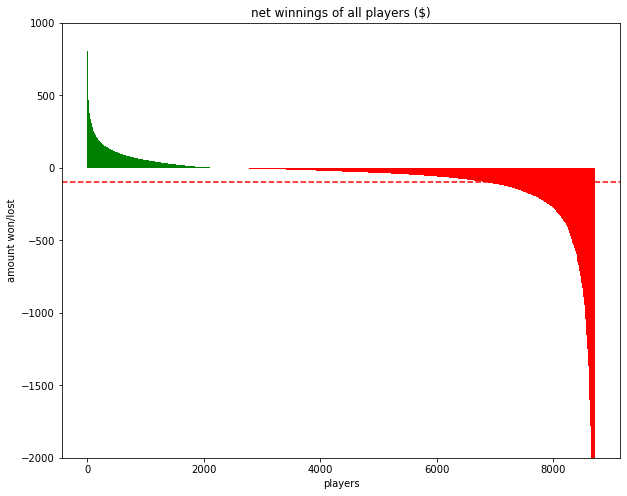

In [24]:
plt.figure(figsize=(10,8))
plt.bar(range(8718), wins['net_win'], width=1, color=wins['win'].map({True:'g', False:'r'}))
plt.ylim((-2000, 1000))
plt.xlabel('players')
plt.ylabel('amount won/lost')
plt.title('net winnings of all players ($)')
plt.axhline(wins['net_win'].mean(), ls = '--', c='red')
plt.show()


#### From what I observed so far, the biggest winner won a total of 1009.25 dollars and the biggest loser lost 13588.31 dollars. The biggests loser played 40 times as many hands as the biggest winner, and this may due to him chasing losses and ended up losing more. 
#### Observing the above graph, there are clearly many more losers than winners, and there are much more money lost than the amount of money won. Even though poker is a zero-sum game, the rake taken by the casino will create an imbalance of wins and loses of the long run.

### Observing relationships
#### In the following sections I will be observing potential relationships within the available data. From the player_info dataframe, it seems like the losers play more hands than the winners, I will attempt to find out if this is true. I will also relationships including but not limited to the following:
* correlation between hands played and net wins
* correlation between volunteerily put chips in pot (VPIP) and net wins
* street of when the hand ended and winners' net wins
* aggressiveness and amount won

I will be subsetting the data frame for players who have played at least 1500 hands for the following analysis (denoted as 'a'), which will limit the effects of extreme good or bad luck on the analysis (such as 100% win rates or 100 dollars won per hand), while leaving enough players active for the analysis to be effective.

I will also construct a line of best fit for each plot to better visualize the correlations.

In [25]:
a = player_info.sort_values('net_win', ascending=False)[player_info['hands_played'] > 1500]

C:\Users\Yanming\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [26]:
# define para using polyfit for a line of best fit
para = np.polyfit(a['hands_played'], a['net_win'], 1)
para

array([ -0.46885275, -67.07020147])

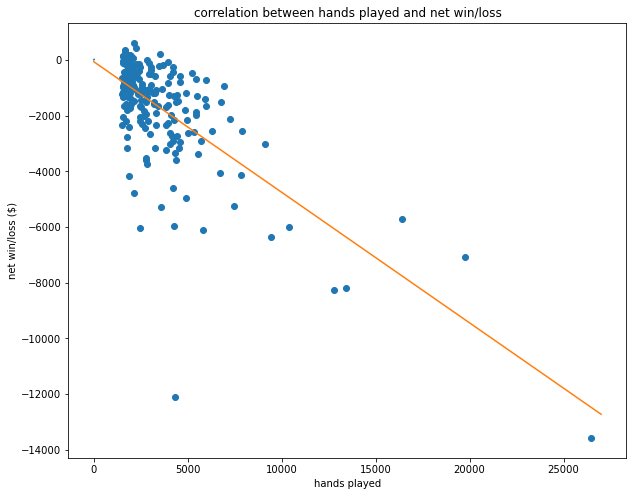

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(a['hands_played'], a['net_win'])
plt.plot(range(20))
plt.xlabel('hands played')
plt.ylabel('net win/loss ($)')
plt.title('correlation between hands played and net win/loss')
x = np.linspace(0, 27000)
plt.plot(x, para[0]*x+para[1])

Volunteerily put chips in pot (VPIP) is the measure of how often a player get involved in a hand.
Generally, if a player plays more than 20%-30% of the hands dealt, it'll become increasingly difficult to win


In [28]:
# Find the VPIP from details_df, look for players who are involved in the pot for greater amount than what they posted for.
vpip = []
for n, i in enumerate(details_df['invest']):
    if i > details_df['post'][n]:
        vpip.append(1)
    else:
        vpip.append(0)

In [29]:
details_df['vpip_count'] = vpip
vpip_df = details_df[['player_id','vpip_count']].groupby('player_id').sum()
vpip_df

,vpip_count
player_id,
++HNtoYfMEJQDBuUlgpmXw,11
++OJ33zjV02/PZlX7Tlz7w,43
++ZiLZDZQ+0Fp0aS/6ZQMQ,11
++igZ0CsO10FWuRQO+b3jA,289
+//1khM9z4eFQt4kS3XzSA,37
...,...
zydUjo8AhaCaJR247d0iDg,163
zyfElRdV2Nsi57YFgHKG1Q,8
zzENGKjKQ1jF+6RPYGuqrw,7


In [30]:
player_info = player_info.join(vpip_df)

In [31]:
# add another column for hands involved, this will include players who put in no more chips than posted chips in a hand
involved = []
for n, i in enumerate(details_df['invest']):
    if i >= details_df['post'][n] and i > 0:
        involved.append(1)
    else:
        involved.append(0)
details_df['inv_count'] = involved
inv_df = details_df[['player_id','inv_count']].groupby('player_id').sum()
inv_df

,inv_count
player_id,
++HNtoYfMEJQDBuUlgpmXw,16
++OJ33zjV02/PZlX7Tlz7w,52
++ZiLZDZQ+0Fp0aS/6ZQMQ,16
++igZ0CsO10FWuRQO+b3jA,403
+//1khM9z4eFQt4kS3XzSA,90
...,...
zydUjo8AhaCaJR247d0iDg,413
zyfElRdV2Nsi57YFgHKG1Q,11
zzENGKjKQ1jF+6RPYGuqrw,10


In [32]:
player_info = player_info.join(inv_df)

In [33]:
player_info['vpip'] = player_info['vpip_count'] / player_info['hands_played']
player_info['% won'] = player_info['pots_won'] / player_info['inv_count']

In [34]:
# vpip values are greatly players who have fewer hands played, I will only be looking at more than 1000 hands
a = player_info.sort_values('net_win', ascending=False)[player_info['hands_played'] > 1500]
a

C:\Users\Yanming\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,hands_played,pots_won,amount_won,to_inv,net_win,per_hand,vpip_count,inv_count,vpip,% won
hc0LUofSVtJkKIO0r20FzA,2147,199.0,4536.24,3919.26,616.98,0.287368,359,770,0.167210,0.258442
gxztVvz8QgeSaABFE8/xYQ,2219,162.0,2950.60,2511.25,439.35,0.197995,311,748,0.140153,0.216578
gm8F7k++eftjEjB5FWxUTA,1671,239.0,5397.90,5041.34,356.56,0.213381,356,816,0.213046,0.292892
Ir5ondonH45KZUPlsjjOZg,1667,176.0,2910.37,2575.30,335.07,0.201002,407,705,0.244151,0.249645
u0CkDvclhtrUnFu6YN41ZA,3549,294.0,4502.37,4297.23,205.14,0.057802,722,1372,0.203438,0.214286
...,...,...,...,...,...,...,...,...,...,...
igvhUfnIs8in/SlI6b2cug,19731,2727.0,46252.14,53338.80,-7086.66,-0.359164,5110,10677,0.258983,0.255409
yspTPyicC4Ere+tsoRHI1A,13411,1987.0,36132.37,44316.40,-8184.03,-0.610248,2950,6500,0.219969,0.305692
vETYfpoA+FhBercnDPJrRw,12770,1857.0,22457.02,30732.37,-8275.35,-0.648031,2542,6545,0.199060,0.283728
0xwi8WGdnBftzWVsP6tu8Q,4337,2432.0,28385.76,40499.21,-12113.45,-2.793048,2438,4336,0.562140,0.560886


In [35]:
para = np.polyfit(a['vpip'], a['per_hand'], 1)
para

array([-3.20310021,  0.30223364])

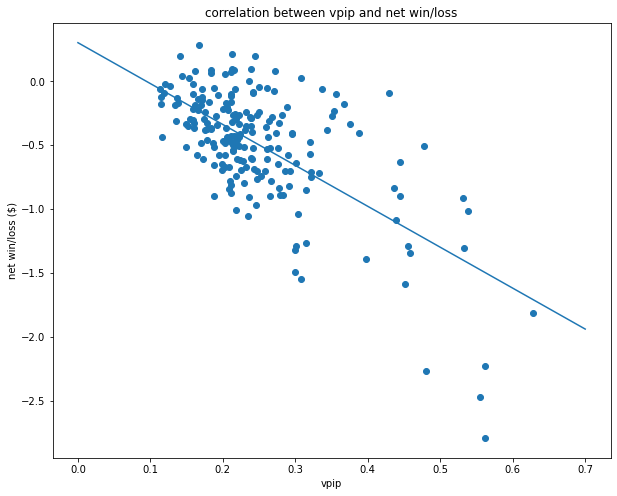

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(a['vpip'], a['per_hand'])
plt.xlabel('vpip')
plt.ylabel('net win/loss ($)')
plt.title('correlation between vpip and net win/loss')
x = np.linspace(0, 0.7)
plt.plot(x, para[0]*x+para[1])

In [37]:
para = np.polyfit(a['vpip'], a['% won'], 1)
para

array([0.58817749, 0.15868809])

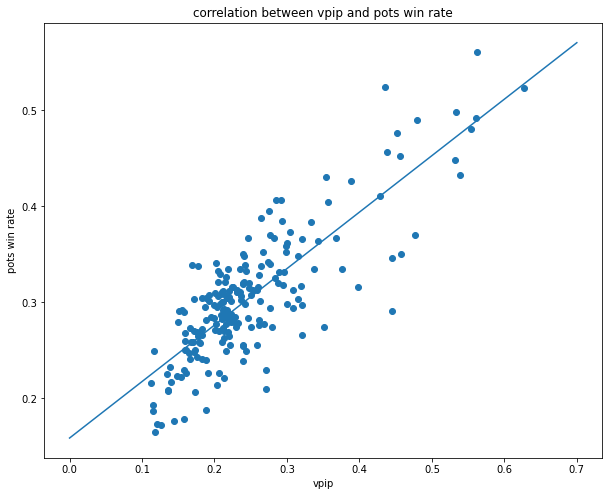

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(a['vpip'], a['% won'])
plt.xlabel('vpip')
plt.ylabel('pots win rate')
plt.title('correlation between vpip and pots win rate')
x = np.linspace(0, 0.7)
plt.plot(x, para[0]*x+para[1])

In [39]:
avg_pot_size = info_df[['winner_player_id', 'pot_size']].groupby('winner_player_id').mean()
avg_pot_size.columns = ['avg_p_size']
player_info = player_info.join(avg_pot_size)
a = player_info.sort_values('net_win', ascending=False)[player_info['hands_played'] > 1500]
a

C:\Users\Yanming\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,hands_played,pots_won,amount_won,to_inv,net_win,per_hand,vpip_count,inv_count,vpip,% won,avg_p_size
hc0LUofSVtJkKIO0r20FzA,2147,199.0,4536.24,3919.26,616.98,0.287368,359,770,0.167210,0.258442,22.795176
gxztVvz8QgeSaABFE8/xYQ,2219,162.0,2950.60,2511.25,439.35,0.197995,311,748,0.140153,0.216578,18.213580
gm8F7k++eftjEjB5FWxUTA,1671,239.0,5397.90,5041.34,356.56,0.213381,356,816,0.213046,0.292892,22.585356
Ir5ondonH45KZUPlsjjOZg,1667,176.0,2910.37,2575.30,335.07,0.201002,407,705,0.244151,0.249645,16.536193
u0CkDvclhtrUnFu6YN41ZA,3549,294.0,4502.37,4297.23,205.14,0.057802,722,1372,0.203438,0.214286,15.314184
...,...,...,...,...,...,...,...,...,...,...,...
igvhUfnIs8in/SlI6b2cug,19731,2727.0,46252.14,53338.80,-7086.66,-0.359164,5110,10677,0.258983,0.255409,16.960814
yspTPyicC4Ere+tsoRHI1A,13411,1987.0,36132.37,44316.40,-8184.03,-0.610248,2950,6500,0.219969,0.305692,18.184383
vETYfpoA+FhBercnDPJrRw,12770,1857.0,22457.02,30732.37,-8275.35,-0.648031,2542,6545,0.199060,0.283728,12.093172
0xwi8WGdnBftzWVsP6tu8Q,4337,2432.0,28385.76,40499.21,-12113.45,-2.793048,2438,4336,0.562140,0.560886,11.671776


In [40]:
para = np.polyfit(a['vpip'], a['avg_p_size'], 1)
para

array([-6.86294794, 16.30169752])

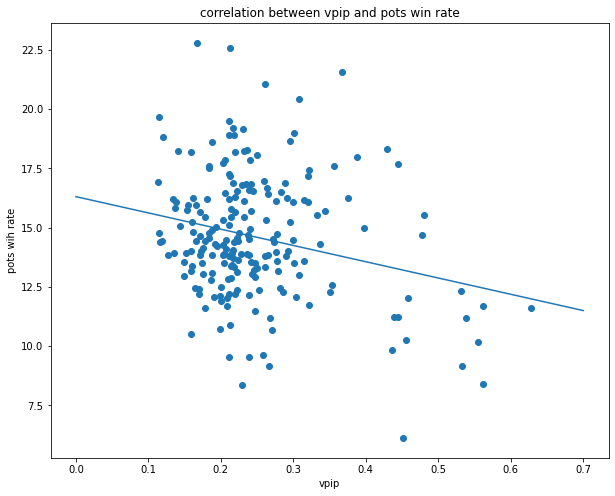

In [41]:
plt.figure(figsize=(10,8))
plt.scatter(a['vpip'], a['avg_p_size'])
plt.xlabel('vpip')
plt.ylabel('pots wih rate')
plt.title('correlation between vpip and pots win rate')
x = np.linspace(0, 0.7)
plt.plot(x, para[0]*x+para[1])

In [42]:
# lastly observe the correlation between aggressiveness and win rate
# bet and raise are considered aggressive actions, while calls and checks are considered passive actions
# assign aggressive actions value of 1 and passive actions value of 0, abserve average values
action = details_df[['player_id', 'preflop', 'flop', 'turn', 'river']]
action.fillna('no action', inplace=True)
action

C:\Users\Yanming\anaconda3\lib\site-packages\pandas\core\frame.py:4320: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,player_id,preflop,flop,turn,river
0,vETYfpoA+FhBercnDPJrRw,Folds,no action,no action,no action
1,DeZAZcPNNQ5w+Wb+5ujZdA,Raises,no action,no action,no action
2,AiiJXMM0CfYl69+Nq3jyfA,no action,no action,no action,no action
3,id+sbECX+YdI8qhMhpje+g,Folds,no action,no action,no action
4,s32h30cC3rPhG5FiSCU42g,Folds,no action,no action,no action
...,...,...,...,...,...
1764892,0xx2I+FfRzMVj7w16FMilQ,Folds,no action,no action,no action
1764893,OPEglAGmUA0vHFHWj5Q2yQ,Folds,no action,no action,no action
1764894,YSHxGU0SJJArHMcfAioprg,Folds,no action,no action,no action
1764895,EL56pDqJIH50UlBT0W57lw,Folds,no action,no action,no action


In [43]:
p_score = []
f_score = []
t_score = []
r_score = []
for i in action['preflop']:
    if 'Raises' in i or 'Bets' in i:
        p_score.append(i.count('Raises') + i.count('bets'))
    else:
        p_score.append(0)
for i in action['flop']:
    if 'Raises' in i or 'Bets' in i:
        f_score.append(i.count('Raises') + i.count('bets'))
    else:
        f_score.append(0)
for i in action['turn']:
    if 'Raises' in i or 'Bets' in i:
        t_score.append(i.count('Raises') + i.count('bets'))
    else:
        t_score.append(0)
for i in action['river']:
    if 'Raises' in i or 'Bets' in i:
        r_score.append(i.count('Raises') + i.count('bets'))
    else:
        r_score.append(0)
len(p_score), len(f_score), len(t_score), len(r_score)

(1764897, 1764897, 1764897, 1764897)

In [44]:
action['p_score'] = p_score
action['f_score'] = f_score
action['t_score'] = t_score
action['r_score'] = r_score
action['tol_score'] = action['p_score']+action['f_score']+action['t_score']+action['r_score']
action

C:\Users\Yanming\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Yanming\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Yanming\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,player_id,preflop,flop,turn,river,p_score,f_score,t_score,r_score,tol_score
0,vETYfpoA+FhBercnDPJrRw,Folds,no action,no action,no action,0,0,0,0,0
1,DeZAZcPNNQ5w+Wb+5ujZdA,Raises,no action,no action,no action,1,0,0,0,1
2,AiiJXMM0CfYl69+Nq3jyfA,no action,no action,no action,no action,0,0,0,0,0
3,id+sbECX+YdI8qhMhpje+g,Folds,no action,no action,no action,0,0,0,0,0
4,s32h30cC3rPhG5FiSCU42g,Folds,no action,no action,no action,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1764892,0xx2I+FfRzMVj7w16FMilQ,Folds,no action,no action,no action,0,0,0,0,0
1764893,OPEglAGmUA0vHFHWj5Q2yQ,Folds,no action,no action,no action,0,0,0,0,0
1764894,YSHxGU0SJJArHMcfAioprg,Folds,no action,no action,no action,0,0,0,0,0
1764895,EL56pDqJIH50UlBT0W57lw,Folds,no action,no action,no action,0,0,0,0,0


In [45]:
player_aggression = action[['player_id', 'tol_score']].groupby('player_id').mean()
player_aggression.columns = ['avg_agg']
player_aggression

,avg_agg
player_id,
++HNtoYfMEJQDBuUlgpmXw,0.041667
++OJ33zjV02/PZlX7Tlz7w,0.400000
++ZiLZDZQ+0Fp0aS/6ZQMQ,0.148148
++igZ0CsO10FWuRQO+b3jA,0.056543
+//1khM9z4eFQt4kS3XzSA,0.125000
...,...
zydUjo8AhaCaJR247d0iDg,0.122619
zyfElRdV2Nsi57YFgHKG1Q,0.210526
zzENGKjKQ1jF+6RPYGuqrw,0.500000


In [46]:
player_info = player_info.join(player_aggression)

In [47]:
a = player_info.sort_values('net_win', ascending=False)[player_info['hands_played'] > 1500]
a

C:\Users\Yanming\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,hands_played,pots_won,amount_won,to_inv,net_win,per_hand,vpip_count,inv_count,vpip,% won,avg_p_size,avg_agg
hc0LUofSVtJkKIO0r20FzA,2147,199.0,4536.24,3919.26,616.98,0.287368,359,770,0.167210,0.258442,22.795176,0.072194
gxztVvz8QgeSaABFE8/xYQ,2219,162.0,2950.60,2511.25,439.35,0.197995,311,748,0.140153,0.216578,18.213580,0.058134
gm8F7k++eftjEjB5FWxUTA,1671,239.0,5397.90,5041.34,356.56,0.213381,356,816,0.213046,0.292892,22.585356,0.165171
Ir5ondonH45KZUPlsjjOZg,1667,176.0,2910.37,2575.30,335.07,0.201002,407,705,0.244151,0.249645,16.536193,0.055189
u0CkDvclhtrUnFu6YN41ZA,3549,294.0,4502.37,4297.23,205.14,0.057802,722,1372,0.203438,0.214286,15.314184,0.039448
...,...,...,...,...,...,...,...,...,...,...,...,...
igvhUfnIs8in/SlI6b2cug,19731,2727.0,46252.14,53338.80,-7086.66,-0.359164,5110,10677,0.258983,0.255409,16.960814,0.044042
yspTPyicC4Ere+tsoRHI1A,13411,1987.0,36132.37,44316.40,-8184.03,-0.610248,2950,6500,0.219969,0.305692,18.184383,0.167474
vETYfpoA+FhBercnDPJrRw,12770,1857.0,22457.02,30732.37,-8275.35,-0.648031,2542,6545,0.199060,0.283728,12.093172,0.145419
0xwi8WGdnBftzWVsP6tu8Q,4337,2432.0,28385.76,40499.21,-12113.45,-2.793048,2438,4336,0.562140,0.560886,11.671776,0.426332


In [48]:
para = np.polyfit(a['avg_agg'], a['per_hand'], 1)
para

array([-3.71613074,  0.07155661])

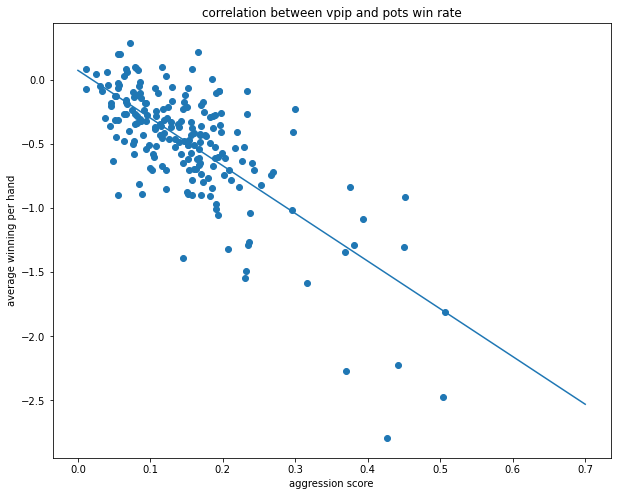

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(a['avg_agg'], a['per_hand'])
plt.xlabel('aggression score')
plt.ylabel('average winning per hand')
plt.title('correlation between vpip and pots win rate')
x = np.linspace(0, 0.7)
plt.plot(x, para[0]*x+para[1])

#### Before finishing EDA, I want to construct a correlation matrix to see how each feature is correlated to winnings per hand. I will first subset the data frame so highly correlated columns are reduced to one column (such as vpip_count and vpip).

In [50]:
a.columns

Index(['hands_played', 'pots_won', 'amount_won', 'to_inv', 'net_win',
       'per_hand', 'vpip_count', 'inv_count', 'vpip', '% won', 'avg_p_size',
       'avg_agg'],
      dtype='object')

In [51]:
corr_mat = a[['vpip', 'inv_count', '% won', 'avg_p_size', 'avg_agg', 'per_hand']]
corr_mat

,vpip,inv_count,% won,avg_p_size,avg_agg,per_hand
hc0LUofSVtJkKIO0r20FzA,0.167210,770,0.258442,22.795176,0.072194,0.287368
gxztVvz8QgeSaABFE8/xYQ,0.140153,748,0.216578,18.213580,0.058134,0.197995
gm8F7k++eftjEjB5FWxUTA,0.213046,816,0.292892,22.585356,0.165171,0.213381
Ir5ondonH45KZUPlsjjOZg,0.244151,705,0.249645,16.536193,0.055189,0.201002
u0CkDvclhtrUnFu6YN41ZA,0.203438,1372,0.214286,15.314184,0.039448,0.057802
...,...,...,...,...,...,...
igvhUfnIs8in/SlI6b2cug,0.258983,10677,0.255409,16.960814,0.044042,-0.359164
yspTPyicC4Ere+tsoRHI1A,0.219969,6500,0.305692,18.184383,0.167474,-0.610248
vETYfpoA+FhBercnDPJrRw,0.199060,6545,0.283728,12.093172,0.145419,-0.648031
0xwi8WGdnBftzWVsP6tu8Q,0.562140,4336,0.560886,11.671776,0.426332,-2.793048


In [52]:
# use the default pearson's coefficient method from pandas
corr_mat.corr()['per_hand']

vpip         -0.656335
inv_count    -0.186590
% won        -0.670872
avg_p_size    0.459156
avg_agg      -0.724169
per_hand      1.000000
Name: per_hand, dtype: float64

Most of the values from the table above are as expected with common sense, except avg_agg.

It is widely accepted that being more aggressive in poker will increase your win rate, because you will win more pots by bluffing your opponent outs of the pot, or bet bigger when your oppenents think you are bluffing when you are actually not. So why is ave_agg negatively correlated with winning per hand here?

One obvious explanation is that this is low stake poker, where a lot of players only know about the phrase "being aggressive will win more pots", but haven't studied the game enough to balance their bluffs with value hands. or betting way too often with marginal hands. This is part of the reason why lower stake poker is very profitable for studied players, where they can leverage the "blind aggression" of the player pool to maximize their winnings.

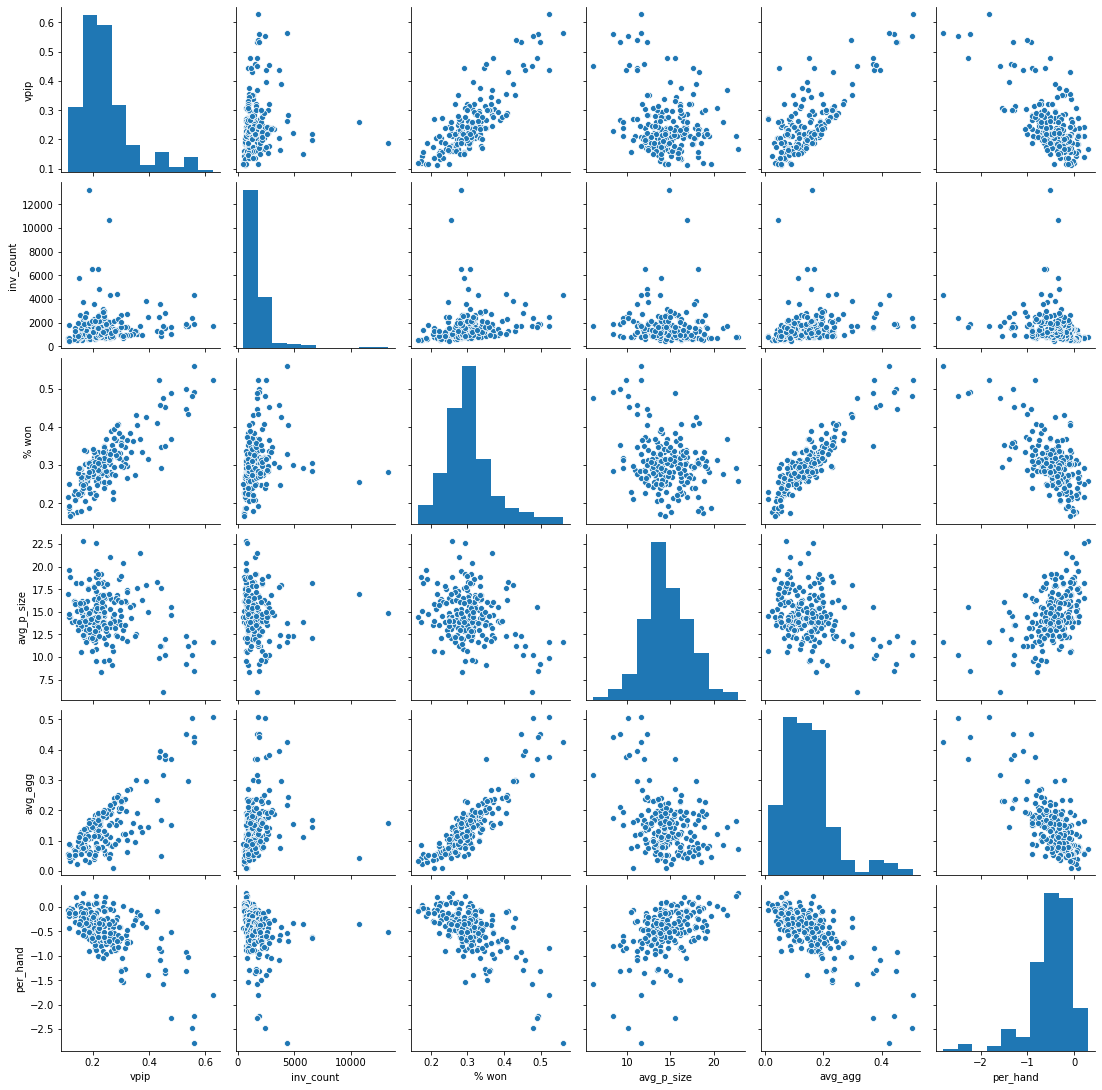

In [53]:
# finally, a pair plot for visualization
sns.pairplot(corr_mat)